In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
matplotlib.rcParams["axes.labelsize"]=14
matplotlib.rcParams["xtick.labelsize"]=12
matplotlib.rcParams["ytick.labelsize"]=12
matplotlib.rcParams["text.color"]="k"

In [2]:
furniture = pd.read_csv("Super_Store.csv", encoding="cp1252")
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [3]:
furniture.shape

(2121, 21)

In [4]:
furniture.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [5]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [6]:
cols = ["Row ID", "Order ID","Ship Date","Ship Mode","Customer ID","Customer Name","Segment","Country","City","State",
        "Postal Code","Region","Product ID","Category","Sub-Category","Product Name","Quantity","Discount","Profit"]
furniture.drop(cols, axis=1, inplace=True)

In [7]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [8]:
furniture = furniture.groupby("Order Date")["Sales"].sum().reset_index()
furniture

,Order Date,Sales
0,1/1/2017,975.4900
1,1/10/2014,51.9400
2,1/10/2015,1018.1040
3,1/10/2016,104.7700
4,1/11/2014,9.9400
...,...,...
884,9/8/2016,3374.9816
885,9/8/2017,1000.2390
886,9/9/2014,864.0240
887,9/9/2016,15.0080


In [9]:
furniture["Order Date"]=pd.to_datetime(furniture["Order Date"])
furniture.set_index("Order Date", inplace = True)
furniture.index

DatetimeIndex(['2017-01-01', '2014-01-10', '2015-01-10', '2016-01-10',
               '2014-01-11', '2016-01-11', '2017-01-12', '2014-01-13',
               '2015-01-13', '2017-01-13',
               ...
               '2014-09-07', '2015-09-07', '2017-09-07', '2014-09-08',
               '2015-09-08', '2016-09-08', '2017-09-08', '2014-09-09',
               '2016-09-09', '2017-09-09'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [10]:
furniture.head()

,Sales
Order Date,
2017-01-01,975.490
2014-01-10,51.940
2015-01-10,1018.104
2016-01-10,104.770
2014-01-11,9.940


In [11]:
furniture.shape

(889, 1)

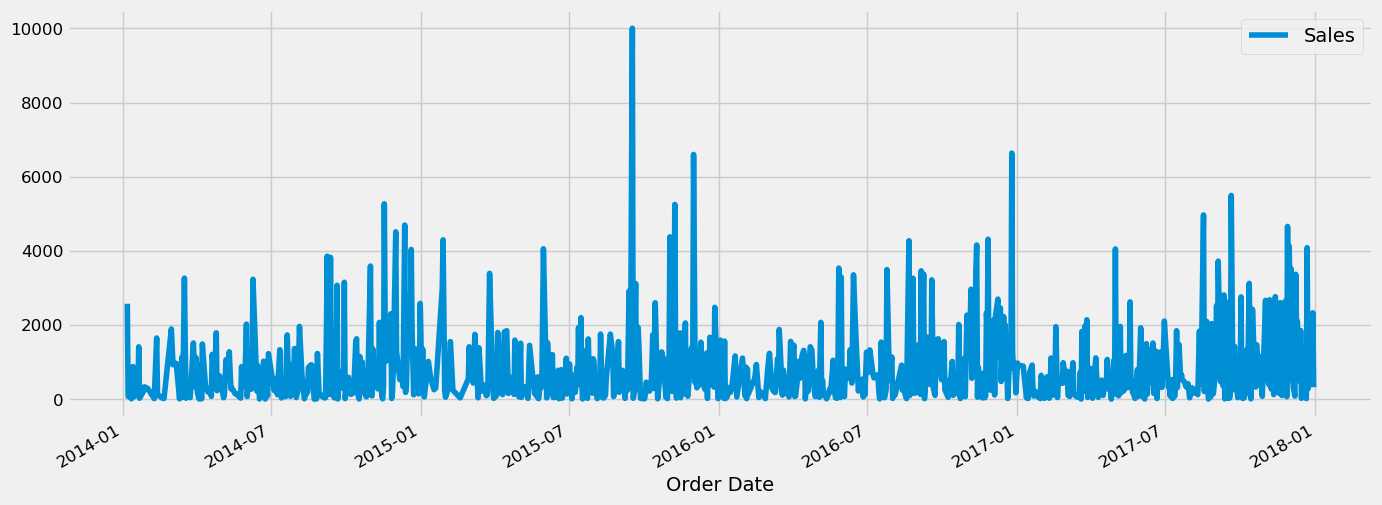

In [12]:
furniture.plot(figsize=(15,6))
plt.show()

In [13]:
y=furniture["Sales"].resample("MS").mean()
y

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

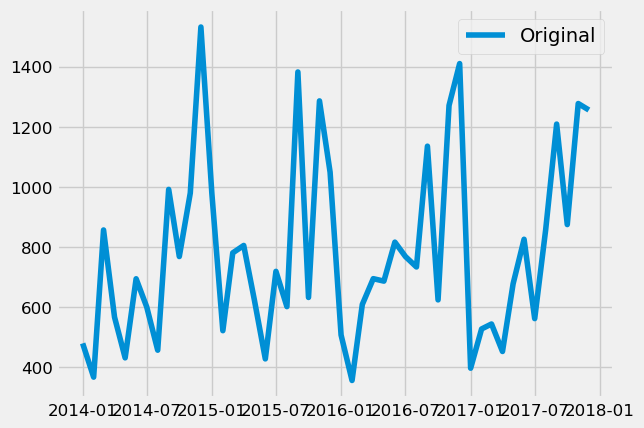

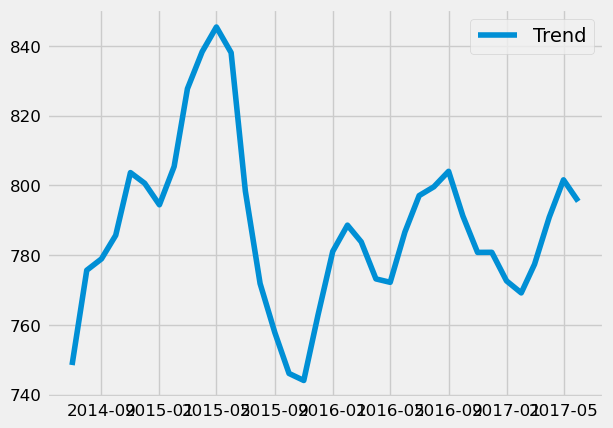

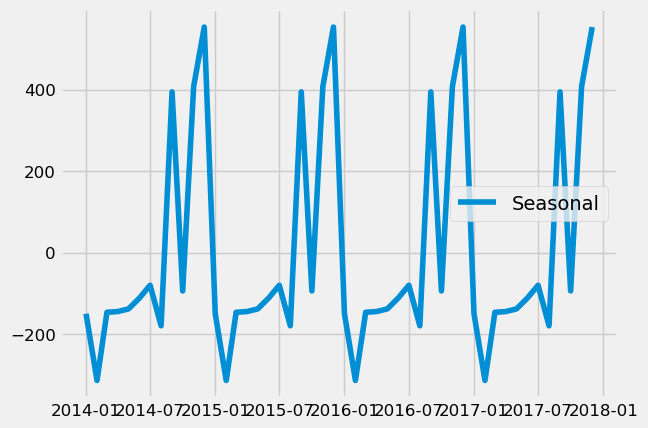

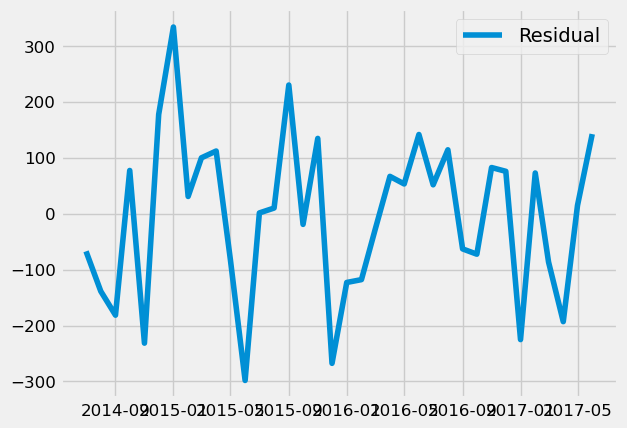

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y, label = "Original")
plt.legend(loc = "best")

trend= decomposition.trend
plt.show()
plt.plot(trend, label = "Trend")
plt.legend(loc = "best")

seasonal= decomposition.seasonal
plt.show()
plt.plot(seasonal, label = "Seasonal")
plt.legend(loc = "best")

residual= decomposition.resid
plt.show()
plt.plot(residual, label = "Residual")
plt.legend(loc = "best")

In [15]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(y)

print("ADF Statistic: %f" % result[0])
print("p-value: %f" % result[1])
print("Critical Values:")
for key, value in result[4].items():
    print("\t%s: %.3f" % (key, value))

ADF Statistic: -5.191070
p-value: 0.000009
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610


Hence pvalue is less than 0.05 it is a strong evidence against null hypothesis so null hypothesis is rejected

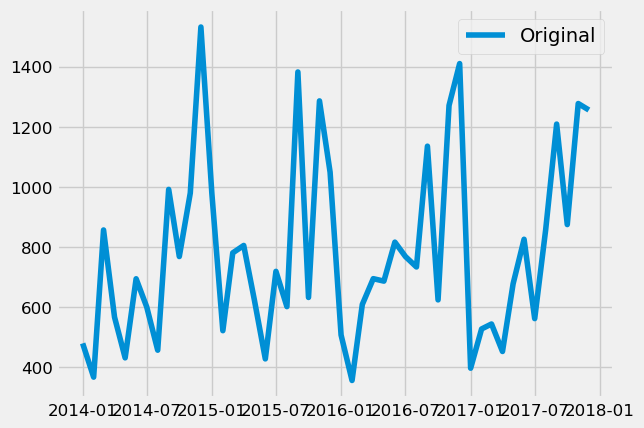

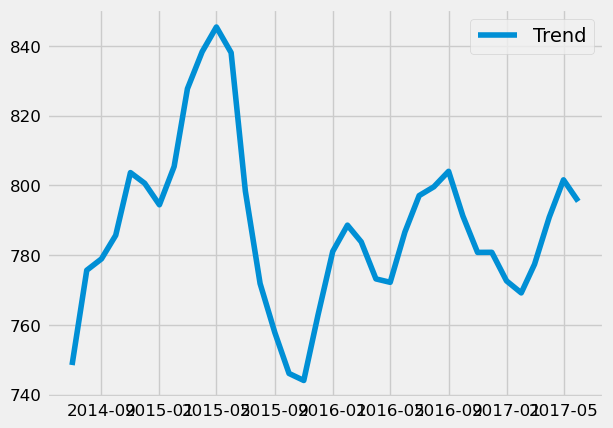

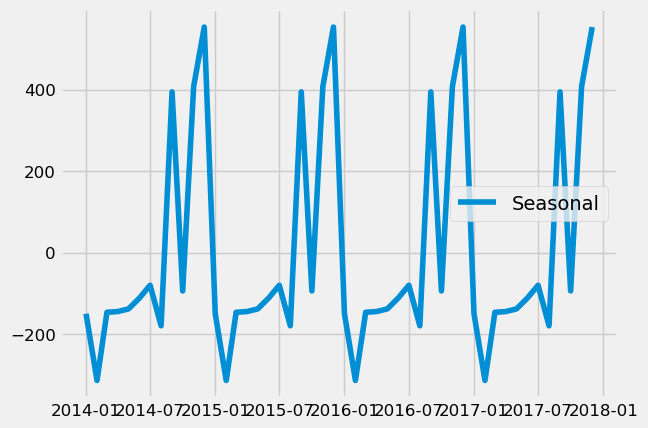

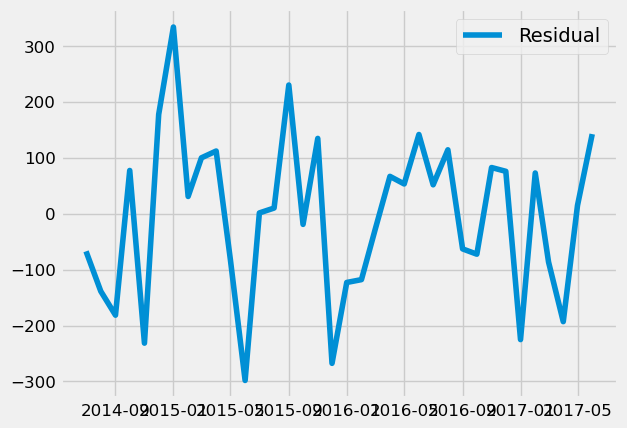

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y, label = "Original")
plt.legend(loc = "best")

trend= decomposition.trend
plt.show()
plt.plot(trend, label = "Trend")
plt.legend(loc = "best")

seasonal= decomposition.seasonal
plt.show()
plt.plot(seasonal, label = "Seasonal")
plt.legend(loc = "best")

residual= decomposition.resid
plt.show()
plt.plot(residual, label = "Residual")
plt.legend(loc = "best")

In [22]:
p=d=q = range(0,2)
pdq= list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))] # 12 is for months calculation
print("Examples for parameter combinations for seasonal ARIMA..")
print("SARIMAX: {} X {}".format(pdq[1], seasonal_pdq[1]))
print("SARIMAX: {} X {}".format(pdq[1], seasonal_pdq[2]))
print("SARIMAX: {} X {}".format(pdq[2], seasonal_pdq[3]))
print("SARIMAX: {} X {}".format(pdq[2], seasonal_pdq[4]))

# pdq or seasonal_pdq outpu will be:
# [(0, 0, 0),
#  (0, 0, 1),
#  (0, 1, 0),
#  (0, 1, 1),
#  (1, 0, 0),
#  (1, 0, 1),
#  (1, 1, 0),
#  (1, 1, 1)]

Examples for parameter combinations for seasonal ARIMA..
SARIMAX: (0, 0, 1) X (0, 0, 1, 12)
SARIMAX: (0, 0, 1) X (0, 1, 0, 12)
SARIMAX: (0, 1, 0) X (0, 1, 1, 12)
SARIMAX: (0, 1, 0) X (1, 0, 0, 12)


In [23]:
from pylab  import rcParams
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationarity = False,
enforce_invertibility  = False)
            results = mod.fit()
            print("ARIMA{}X{}12 - AIC:{}".format(param, param_seasonal, results.aic))
        except:
            continue
            

ARIMA(0, 0, 0)X(0, 0, 0, 12)12 - AIC:769.0817523205915
ARIMA(0, 0, 0)X(0, 0, 1, 12)12 - AIC:1539.0220714082793
ARIMA(0, 0, 0)X(0, 1, 0, 12)12 - AIC:477.71701309212006
ARIMA(0, 0, 0)X(0, 1, 1, 12)12 - AIC:302.2702899793643
ARIMA(0, 0, 0)X(1, 0, 0, 12)12 - AIC:497.2314433418338
ARIMA(0, 0, 0)X(1, 0, 1, 12)12 - AIC:1261.957013914794
ARIMA(0, 0, 0)X(1, 1, 0, 12)12 - AIC:318.00471991163414
ARIMA(0, 0, 0)X(1, 1, 1, 12)12 - AIC:304.2488280301585
ARIMA(0, 0, 1)X(0, 0, 0, 12)12 - AIC:720.9252270758096
ARIMA(0, 0, 1)X(0, 0, 1, 12)12 - AIC:2676.0303932596075
ARIMA(0, 0, 1)X(0, 1, 0, 12)12 - AIC:466.5607429809145
ARIMA(0, 0, 1)X(0, 1, 1, 12)12 - AIC:291.62613896732955
ARIMA(0, 0, 1)X(1, 0, 0, 12)12 - AIC:499.59400464461817
ARIMA(0, 0, 1)X(1, 0, 1, 12)12 - AIC:2526.5039934482124
ARIMA(0, 0, 1)X(1, 1, 0, 12)12 - AIC:319.98848769468674
ARIMA(0, 0, 1)X(1, 1, 1, 12)12 - AIC:291.8725576485353
ARIMA(0, 1, 0)X(0, 0, 0, 12)12 - AIC:677.8947668414504
ARIMA(0, 1, 0)X(0, 0, 1, 12)12 - AIC:1364.5670805361096
A

In [24]:
# Randomly taking minimum aic as 283 which is last one... Actually by applying min() we have to calculate min aic score
mod = sm.tsa.statespace.SARIMAX(y,
                               order = (1,1,1),
                               seasonal_order = (1,1,1,12),
                               enforce_invertibility = False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0854      0.240      0.356      0.722      -0.385       0.556
ma.L1         -1.0000   3188.473     -0.000      1.000   -6250.293    6248.293
ar.S.L12       0.0274      0.512      0.053      0.957      -0.977       1.032
ma.S.L12      -1.0001   3188.131     -0.000      1.000   -6249.622    6247.621
sigma2      2.715e+04      0.050    5.4e+05      0.000    2.71e+04    2.71e+04


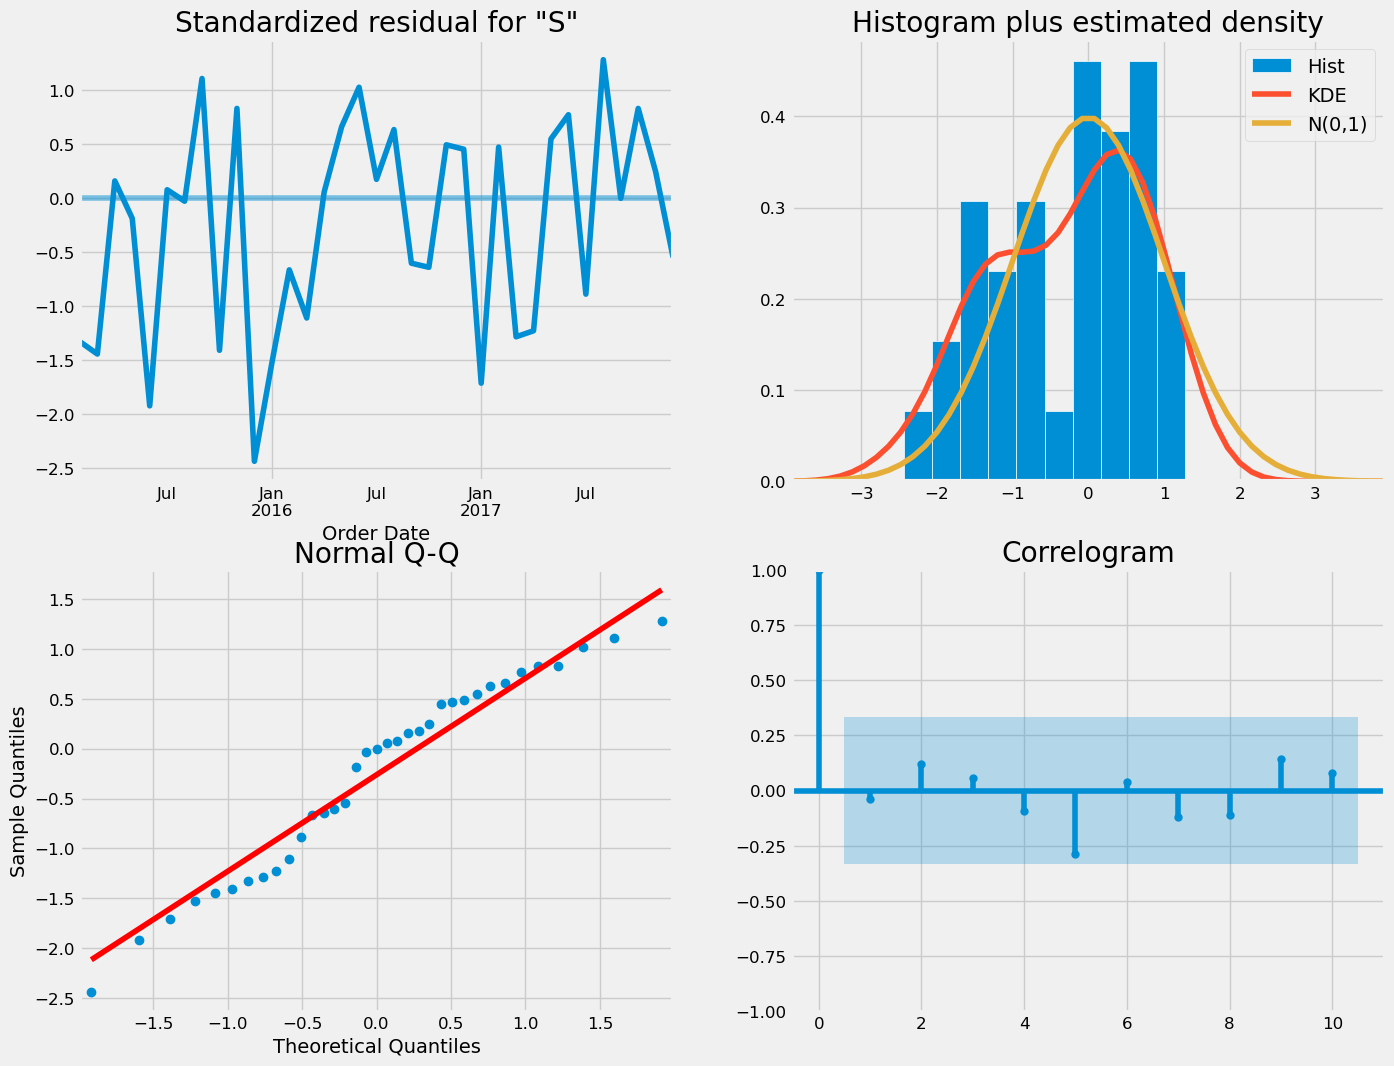

In [25]:
results.plot_diagnostics(figsize=(15,12))
plt.show()

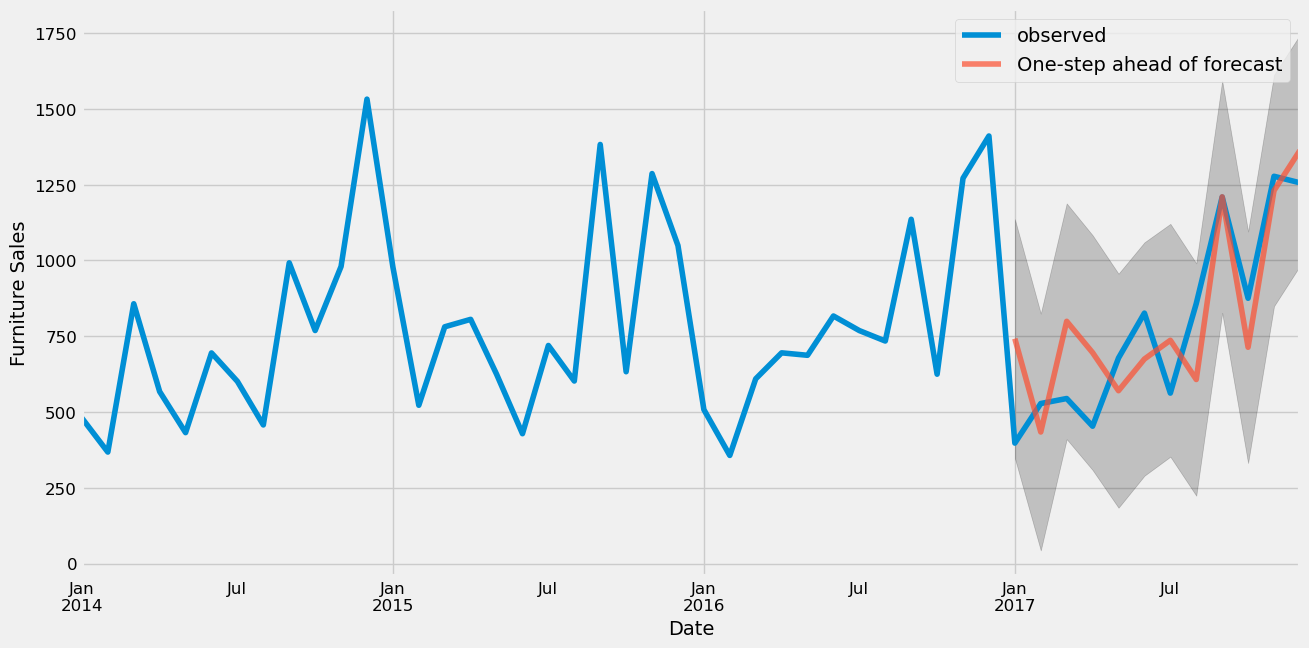

In [27]:
pred = results.get_prediction(start=pd.to_datetime("2017-01-01"),dynamic=False)
pred_ci = pred.conf_int()
ax = y["2014":].plot(label = "observed")
pred.predicted_mean.plot(ax=ax, label = "One-step ahead of forecast", alpha = .7, figsize = (14,7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1], color  = "k", alpha=.2)
ax.set_xlabel("Date")
ax.set_ylabel("Furniture Sales")
plt.legend()
plt.show()

In [28]:
y_forecasted = pred.predicted_mean
y_truth = y["2017-01-01":]
mse = ((y_forecasted - y_truth)**2).mean()
print("The Mean Squared Error of our forecasts is {}".format(round(mse, 2)))
print("The Root Mean Squared Error of our forecats is {}".format(round(np.sqrt(mse),2)))

The Mean Squared Error of our forecasts is 34904.03
The Root Mean Squared Error of our forecats is 186.83


            lower Sales  upper Sales
2018-01-01   250.479987  1000.538574
2018-02-01   116.186271   872.709993
2018-03-01   359.961522  1116.864797
2018-04-01   291.950000  1048.885177
2018-05-01   275.399693  1032.337679
2018-06-01   363.459523  1120.397761
2018-07-01   327.346803  1084.285084
2018-08-01   338.748714  1095.687181
2018-09-01   842.470300  1599.410426
2018-10-01   403.477213  1160.432254
2018-11-01   869.496962  1626.582482
2018-12-01   964.042830  1721.830971
2019-01-01   260.071021  1052.380007


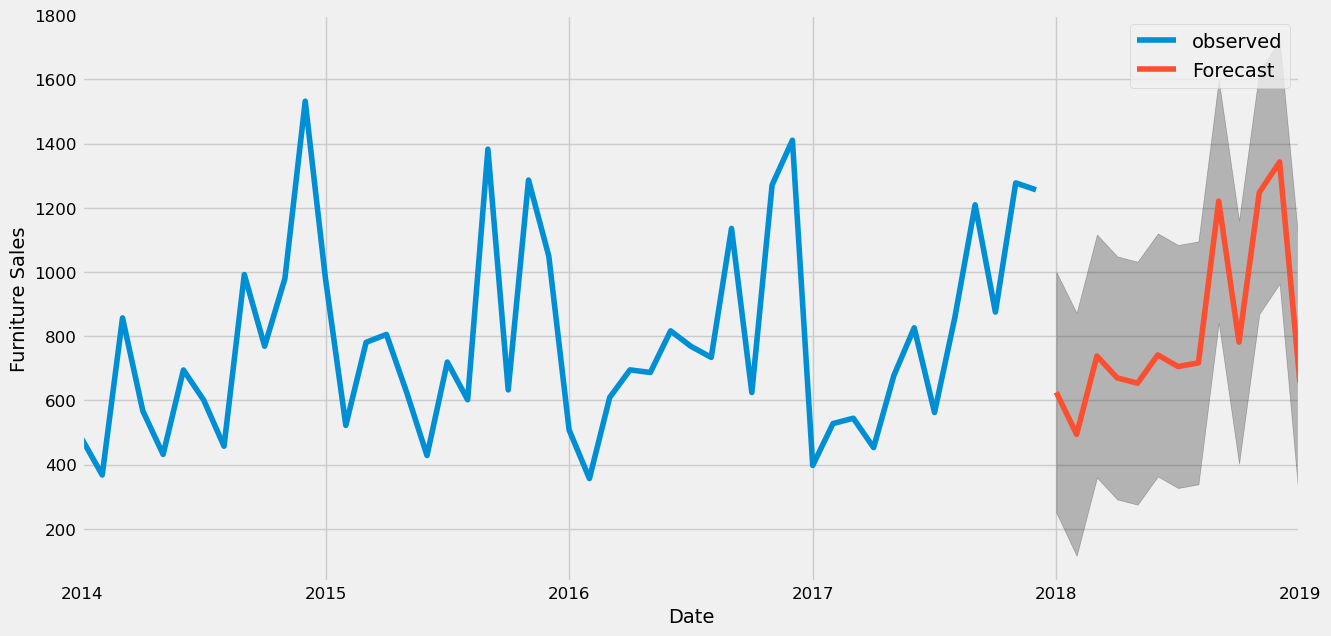

In [30]:
pred_uc = results.get_forecast(steps=13)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
print(pred_ci)
plt.legend()
plt.show()

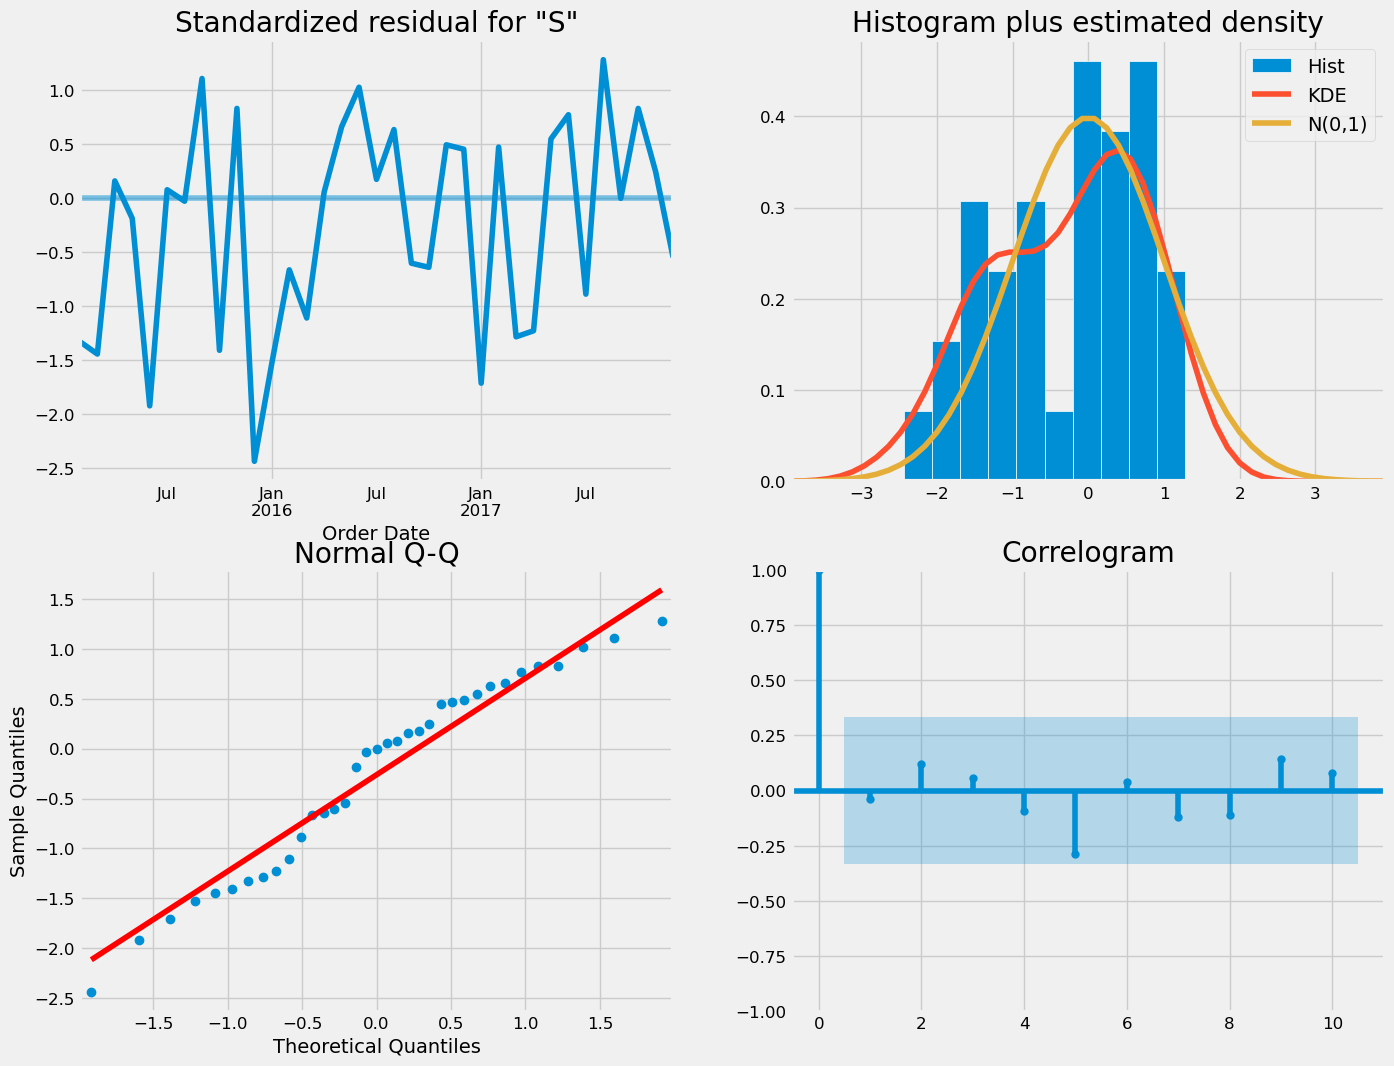

In [31]:
results.plot_diagnostics(figsize=(15,12))
plt.show()